In [1]:
import sys
sys.path.append('/NDDepth/src')

In [2]:
from PIL import Image
import torch
import tqdm
from torch.utils.data import DataLoader
import torch.nn.functional as F

import matplotlib.pyplot as plt
from model import Model, ModelConfig
from dataloader import ImageDataset, preprocess_transform

torch.manual_seed(42)
MODEL_PATH = "./model.pth"

test_dataset = ImageDataset('/scratchdata/nyu_data', '/scratchdata/nyu_data/data/nyu2_test.csv', transform=preprocess_transform)
test_dataloader = DataLoader(test_dataset, batch_size=1, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


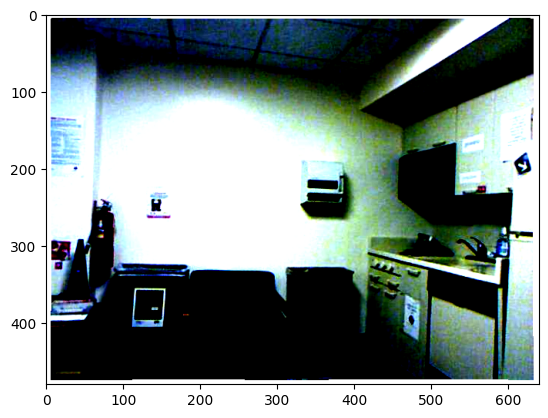

In [3]:
for i, data in enumerate(test_dataloader):
    break
plt.imshow(data["pixel_values"].squeeze().permute(1, 2, 0))

In [4]:
config =  ModelConfig("tiny07")
model = Model(config).to("cuda")
torch.load(MODEL_PATH, weights_only=False)

OrderedDict([('backbone.backbone.embeddings.patch_embeddings.projection.weight',
              tensor([[[[ 0.0195, -0.0324, -0.0251, -0.0181],
                        [-0.0650, -0.0318, -0.0057, -0.0248],
                        [-0.0083, -0.0121, -0.0274, -0.0223],
                        [-0.0165, -0.0099, -0.0114,  0.0284]],
              
                       [[ 0.0080,  0.0343, -0.0050,  0.0112],
                        [-0.0067, -0.0475, -0.0102,  0.0065],
                        [-0.0188, -0.0420,  0.0001,  0.0133],
                        [-0.0168, -0.0194, -0.0612,  0.0417]],
              
                       [[-0.0605, -0.0422, -0.0474, -0.0673],
                        [-0.0406, -0.0931, -0.0552, -0.0457],
                        [ 0.0028, -0.0509, -0.0834, -0.0682],
                        [-0.0583, -0.0522, -0.0728, -0.0326]]],
              
              
                      [[[ 0.0244,  0.0379,  0.0152,  0.0030],
                        [ 0.0145,  0.0756,  0.061

In [5]:
for k in data.keys(): data[k] = data[k].to("cuda")
d1_list, u1, d2_list, u2 = model(data)

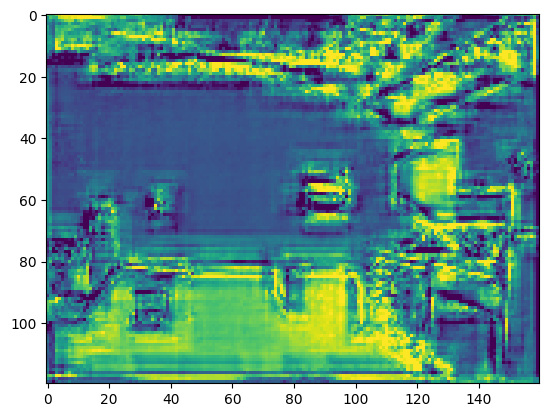

In [6]:
plt.imshow(d2_list[-1].cpu().detach().squeeze())